In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy.utils.data import get_pkg_data_filename
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning) 
from fermipy.gtanalysis import GTAnalysis
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
c = np.load('Crab_5/fit0.npy', allow_pickle=True).flat[0]

In [4]:
gta = GTAnalysis('new_data/config_5.yaml',logging={'verbosity': 3},fileio={'outdir': 'Crab_5'})
gta.load_roi('fit0')

2022-02-10 10:42:59 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8
2022-02-10 10:42:59 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/user/fermi/Crab_nebula/Crab_nebula_Analysis/Crab_5/fit0.npy
2022-02-10 10:42:59 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2022-02-10 10:43:35 INFO    GTAnalysis.load_roi(): Finished Loading ROI


In [5]:
gta.print_roi()

2022-02-10 10:44:06 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0534.5+2200   PointSource    PLSuperExpCuto    0.003  94335.80    370104.3
4FGL J0534.5+2201s  PointSource    PowerLaw          0.005   8453.90     64873.3
4FGL J0534.5+2201i  RadialGaussian LogParabola       0.006  18389.27     96667.0
4FGL J0526.3+2246   PointSource    PowerLaw          2.037     85.04      1858.8
4FGL J0544.4+2238   PointSource    PowerLaw          2.375     37.54      1135.1
isodiff             ConstantValue  FileFunction      -----    948.74     36922.3
galdiff             MapCubeFunctio PowerLaw          -----  78966.67    191576.5



In [6]:
gta.print_params()

2022-02-10 10:44:15 INFO    GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J0526.3+2246
   0 Prefactor                 1.76     0.203     1e-05     1e+03     1e-14    *
   1 Index                     2.48         0         0         5        -1     
   2 Scale                  4.4e+03         0   4.4e+03   4.4e+03         1     
4FGL J0534.5+2200
   3 Prefactor                 1.37   0.00475     1e-05     1e+03     1e-10    *
   4 Index1                    1.87         0         0         5        -1     
   5 Scale                 1.46e+03         0  1.46e+03  1.46e+03         1     
   6 Expfactor                0.463         0      -0.5       0.5      0.01     
   7 Index2                   0.667         0         0         2         1     
4FGL J0534.5+2201i
   8 norm                     0.668    0.0379     1e-05     1e+03     1e-12    

4FGL J0526.3+2246

In [12]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])
print(len(dnde))
print(len(E))

50
50


In [104]:
E = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde'])

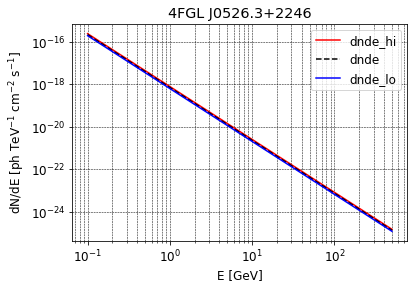

In [105]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [36]:
sed2246 = gta.sed('4FGL J0526.3+2246')

2022-02-10 11:28:33 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0526.3+2246
2022-02-10 11:28:50 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-10 11:28:50 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-10 11:29:19 INFO    GTAnalysis.sed(): Finished SED
2022-02-10 11:29:26 INFO    GTAnalysis.sed(): Execution time: 53.08 s


In [60]:
src = gta.roi['4FGL J0526.3+2246']

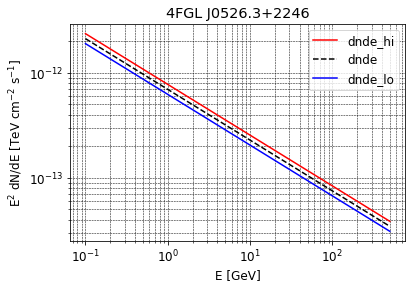

In [106]:

plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

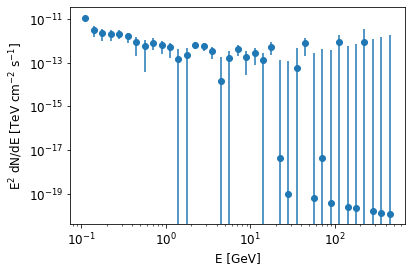

In [76]:
plt.errorbar(np.array(sed2246['e_ctr']*1e-3),
             sed2246['e2dnde']*1e-6, 
             yerr=sed2246['e2dnde_err']*1e-6, fmt ='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

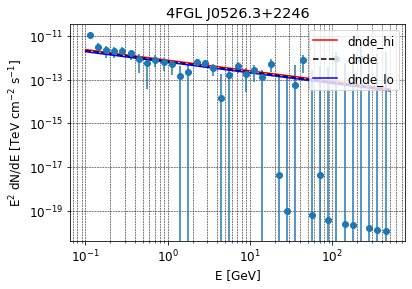

In [73]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2246['e_ctr']*1e-3),
             sed2246['e2dnde']*1e-6, 
             yerr=sed2246['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()

4FGL J0534.5+2200

In [107]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])


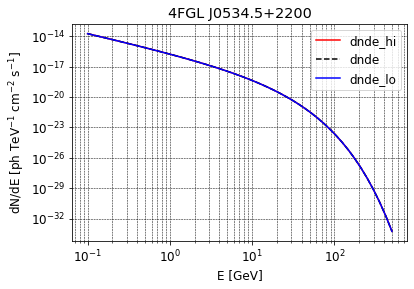

In [108]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [37]:
sed2200 = gta.sed('4FGL J0534.5+2200')

2022-02-10 11:29:32 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2200
2022-02-10 11:29:46 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-10 11:29:46 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-02-10 11:30:08 INFO    GTAnalysis.sed(): Finished SED
2022-02-10 11:30:15 INFO    GTAnalysis.sed(): Execution time: 42.85 s


In [66]:
src2200 = gta.roi['4FGL J0534.5+2200']

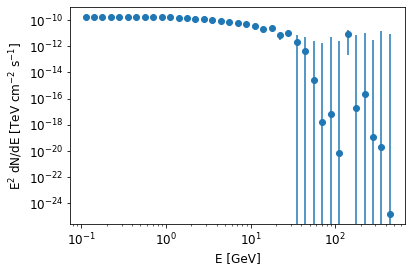

In [77]:
plt.errorbar(np.array(sed2200['e_ctr']*1e-3),
             sed2200['e2dnde']*1e-6, 
             yerr=sed2200['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

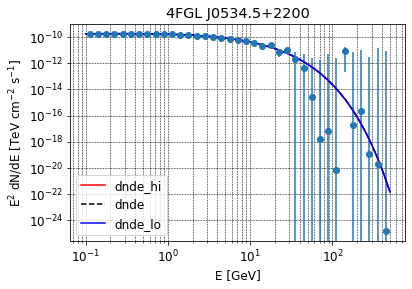

In [92]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2200['e_ctr']*1e-3),
             sed2200['e2dnde']*1e-6, 
             yerr=sed2200['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left')
plt.show()

4FGL J0534.5+2201i

In [109]:
E = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde'])


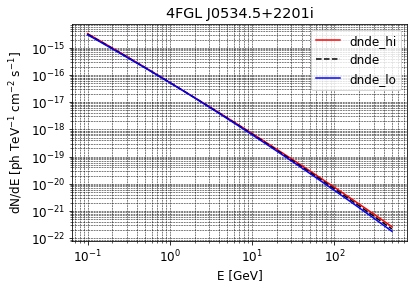

In [110]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [38]:
sed2201i = gta.sed('4FGL J0534.5+2201i')

2022-02-10 11:30:15 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201i
2022-02-10 11:30:41 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-10 11:30:41 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-02-10 11:31:04 INFO    GTAnalysis.sed(): Finished SED
2022-02-10 11:31:10 INFO    GTAnalysis.sed(): Execution time: 55.40 s


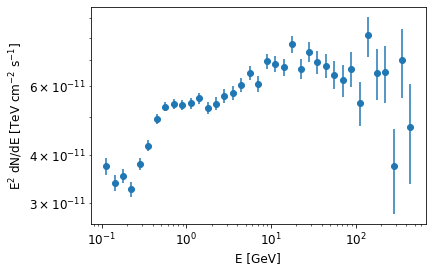

In [80]:
plt.errorbar(np.array(sed2201i['e_ctr']*1e-3),
             sed2201i['e2dnde']*1e-6, 
             yerr=sed2201i['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

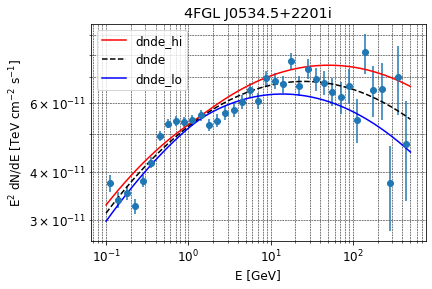

In [88]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201i['e_ctr']*1e-3),
             sed2201i['e2dnde']*1e-6, 
             yerr=sed2201i['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper left')
plt.show()

4FGL J0534.5+2201s

In [111]:
E = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde'])


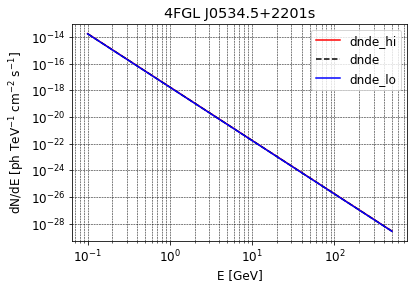

In [112]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [39]:
sed2201s = gta.sed('4FGL J0534.5+2201s')

2022-02-10 11:31:10 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201s
2022-02-10 11:31:20 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-10 11:31:20 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-10 11:31:42 INFO    GTAnalysis.sed(): Finished SED
2022-02-10 11:31:49 INFO    GTAnalysis.sed(): Execution time: 38.16 s


In [117]:
np.array(sed2201s['e_ctr']*1e-3)

array([1.12197970e-01, 1.41239119e-01, 1.77799281e-01, 2.23823148e-01,
       2.81757185e-01, 3.54686779e-01, 4.46498496e-01, 5.62075946e-01,
       7.07562813e-01, 8.90707276e-01, 1.12125657e+00, 1.41149713e+00,
       1.77686732e+00, 2.23678891e+00, 2.81575588e+00, 3.54458177e+00,
       4.46210720e+00, 5.61713679e+00, 7.07106778e+00, 8.90133201e+00,
       1.12054680e+01, 1.41060364e+01, 1.77572210e+01, 2.23534726e+01,
       2.81394108e+01, 3.54233802e+01, 4.45928264e+01, 5.61351645e+01,
       7.06651036e+01, 8.89559496e+01, 1.11982459e+02, 1.40969448e+02,
       1.77457762e+02, 2.23390654e+02, 2.81215983e+02, 3.54009568e+02,
       4.45640856e+02])

In [118]:
sed2201s['e2dnde']*1e-6

array([1.39245738e-10, 8.63620785e-11, 5.23444517e-11, 2.65744947e-11,
       1.63574858e-11, 1.01567158e-11, 1.01636124e-11, 8.67088545e-12,
       5.40177125e-12, 1.97034321e-12, 5.12752923e-15, 3.37295232e-17,
       9.92645374e-17, 8.28682555e-17, 1.30262440e-17, 4.67072729e-18,
       8.75795163e-19, 5.72549072e-14, 3.42049267e-20, 3.36002155e-12,
       2.22345055e-12, 6.94374126e-15, 9.81260479e-12, 2.96806972e-16,
       4.23207142e-12, 4.40831165e-15, 1.61530605e-15, 2.24093033e-17,
       4.30406377e-21, 3.52402387e-16, 1.75095993e-23, 3.41255116e-15,
       1.69692672e-17, 3.80696214e-17, 2.08959527e-24, 4.41710080e-18,
       6.70603091e-19])

In [119]:
sed2201s['e2dnde_err']*1e-6

array([1.84149102e-12, 1.57957140e-12, 1.45171408e-12, 1.37627339e-12,
       1.36513814e-12, 1.37183269e-12, 1.40792526e-12, 1.45836926e-12,
       1.52026905e-12, 1.59622106e-12, 1.55711024e-12, 1.26091983e-12,
       3.20124565e-13, 3.53474036e-13, 4.90904420e-13, 5.44610872e-13,
       8.87865900e-13, 2.77499346e-12, 8.72800548e-13, 3.10125923e-12,
       3.29104913e-12, 3.50847602e-12, 3.75513880e-12, 3.65414368e-12,
       4.40034133e-12, 4.76444448e-12, 5.23437184e-12, 4.87694237e-12,
       3.58448793e-12, 7.20744331e-12, 2.94621413e-12, 9.46828695e-12,
       1.09875852e-11, 1.09045709e-11, 2.94198979e-12, 1.45860683e-11,
       1.28259550e-11])

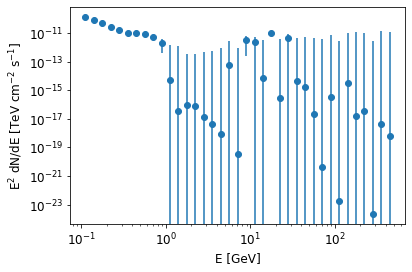

In [120]:
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             sed2201s['e2dnde']*1e-6, 
             yerr=np.array(sed2201s['e2dnde_err']*1e-6), fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

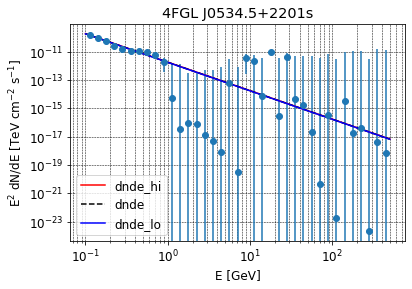

In [114]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             sed2201s['e2dnde']*1e-6, 
             yerr=sed2201s['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left')
plt.show()

4FGL J0544.4+2238

In [121]:
E = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde'])


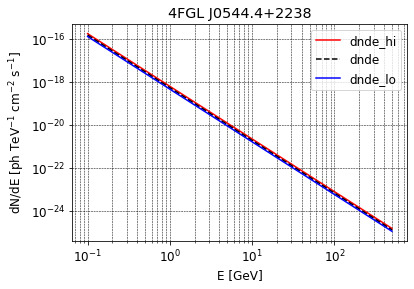

In [122]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [40]:
sed2238 = gta.sed('4FGL J0544.4+2238')

2022-02-10 11:31:49 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0544.4+2238
2022-02-10 11:31:58 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-10 11:31:58 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-10 11:32:20 INFO    GTAnalysis.sed(): Finished SED
2022-02-10 11:32:27 INFO    GTAnalysis.sed(): Execution time: 38.59 s


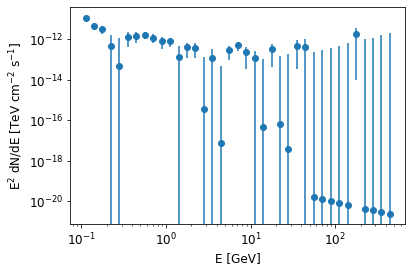

In [123]:
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

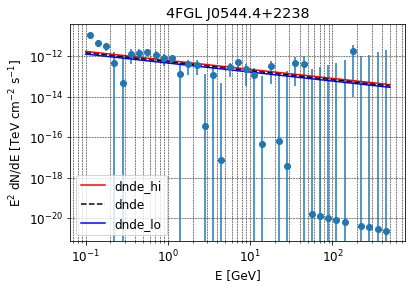

In [103]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left')
plt.show()